# Matplotlib Homework

# # Unit 5 | Assignment - The Power of Plots

## Pyber

The ride sharing bonanza continues! Seeing the success of notable players like Uber and Lyft, you've decided to join a fledgling ride sharing company of your own. In your latest capacity, you'll be acting as Chief Data Strategist for the company. In this role, you'll be expected to offer data-backed guidance on new opportunities for market differentiation.

You've since been given access to the company's complete recordset of rides. This contains information about every active driver and historic ride, including details like city, driver count, individual fares, and city type.

Your objective is to build a [Bubble Plot](https://en.wikipedia.org/wiki/Bubble_chart) that showcases the relationship between four key variables:

* Average Fare ($) Per City
* Total Number of Rides Per City
* Total Number of Drivers Per City
* City Type (Urban, Suburban, Rural)

In addition, you will be expected to produce the following three pie charts:

* % of Total Fares by City Type
* % of Total Rides by City Type
* % of Total Drivers by City Type

As final considerations:

* You must use the Pandas Library and the Jupyter Notebook.
* You must use the Matplotlib library.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles, Axes Labels, Legend Labels, Wedge Percentages, and Wedge Labels.
* Remember when making your plots to consider aesthetics!
  * You must stick to the Pyber color scheme (Gold, Light Sky Blue, and Light Coral) in producing your plot and pie charts.
  * When making your Bubble Plot, experiment with effects like `alpha`, `edgecolor`, and `linewidths`.
  * When making your Pie Chart, experiment with effects like `shadow`, `startangle`, and `explosion`.
* See [Starter Workbook](Pyber/pyber_starter.ipynb) for a reference on expected format.

In [1]:
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

In [4]:
# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

In [5]:
ride_data.head(1)

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873


In [6]:
city_data.head(1)

,city,driver_count,type
0,Richardfort,38,Urban


In [7]:
# Combine the data into a single dataset
datasets_complete_df = pd.merge(city_data, ride_data, how="left", 
                                on=["city"])

In [8]:
# Display the data table for preview
datasets_complete_df.head(1)

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794


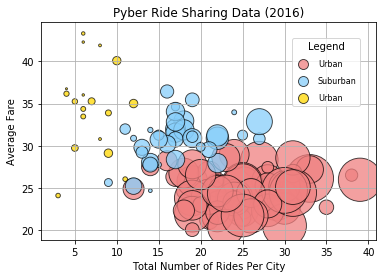

In [9]:
# Bubble Plot the relationship of the four variables:

# Urban Data
# Select the Urban Series from Merged DataFrame using loc
urban = datasets_complete_df.loc[datasets_complete_df["type"]=="Urban"]
# Average Fare ($) Per City
urban_average_fare = urban.groupby(["city"]).mean()["fare"]
# Total Drivers
urban_total_drivers = urban.groupby(["city"]).sum()["driver_count"]
# Total Rides
urban_total_rides = urban.groupby(["city"]).count()["ride_id"]
# Scatter Plot for Urban data
plt.scatter(urban_total_rides,
            urban_average_fare,
            s=urban_total_drivers,
            marker="o",
            c="lightcoral",
            edgecolor="black",
            label="Urban",
            alpha=0.75,
            linewidths=.9, )

# Suburban Data
# Select the Suburban series from Merged DataFrame using loc
suburban = datasets_complete_df.loc[datasets_complete_df["type"]=="Suburban"]
# Average Fare ($) Per City
suburban_average_fare = suburban.groupby(["city"]).mean()["fare"]
# Total Drivers 
suburban_total_drivers = suburban.groupby(["city"]).sum()["driver_count"]
# Total Rides
suburban_total_rides = suburban.groupby(["city"]).count()["ride_id"]
# Scatter Plot for Suburban data
plt.scatter(suburban_total_rides,
            suburban_average_fare,
            s=suburban_total_drivers,
            marker="o",
            c="lightskyblue",
            edgecolor="black",
            label="Suburban",
            alpha=0.75,
            linewidths=.9)

# Rural Data 
# Select the Suburban series from Merged DataFram using loc
rural = datasets_complete_df.loc[datasets_complete_df["type"]=="Rural"]
# Average Fare ($) Per City
rural_average_fare = rural.groupby(["city"]).mean()["fare"]
# Total Drivers
rural_total_drivers = rural.groupby(["city"]).sum()["driver_count"]
# Total Rides
rural_total_rides = rural.groupby(["city"]).count()["ride_id"]
# Scatter Plot for Rural data
plt.scatter(rural_total_rides,
            rural_average_fare,
            s=rural_total_drivers,
            marker="o",
            c="gold",
            edgecolor="black",
            label="Urban",
            alpha=0.75,
            linewidths=.9)

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides Per City")
plt.ylabel("Average Fare")
legend = plt.legend(loc='best', title="Legend", labelspacing=1, borderaxespad=2, numpoints=1, ncol=1, fontsize=8, bbox_to_anchor=(1,1) )
legend.legendHandles[0]._sizes=[100]
legend.legendHandles[1]._sizes=[100]
legend.legendHandles[2]._sizes=[100]
plt.grid(True)
# fig, ax = plt.subplots()
# ax.set_axisbelow(True)

plt.show()

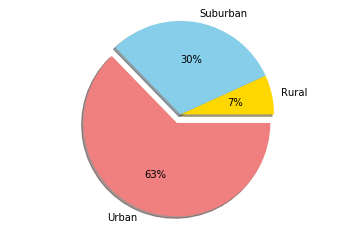

In [10]:
# PIE CHART #1: FARES

# Total Fares by City Type
city_fare_pie = datasets_complete_df.groupby(["type"])["fare"].sum()
# Index for the City type
city_fare_pie.index
# Set Colors for section of Pie Chart
colors = ["gold", "skyblue", "lightcoral"]
# Slice from the Suburban and Rural sections
explode = (0,0, 0.1)
# Create Pie Chart
plt.pie(city_fare_pie, 
        labels = city_fare_pie.index, 
        autopct = "%1.0f%%", 
        colors = colors, 
        explode = explode, 
        shadow = True, )
plt.axis("equal")
plt.show()

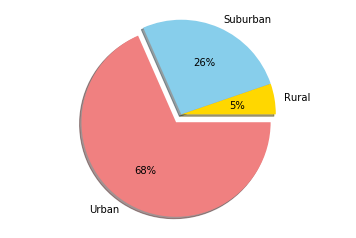

In [11]:
# PIE CHART #2: RIDES

# Total Rides by City Type
city_ride_pie = datasets_complete_df.groupby(["type"])["ride_id"].count()
# Index for the ride_id type
city_ride_pie.index
# Set Colors for section of Pie Chart
colors = ["gold", "skyblue", "lightcoral"]
# Slice from the Suburban and Rural sections
explode = (0,0, 0.1)
# Create Pie Chart
plt.pie(city_ride_pie, 
        labels = city_ride_pie.index, 
        autopct = "%1.0f%%", 
        colors = colors, 
        explode = explode, 
        shadow = True, )
plt.axis("equal")
plt.show()

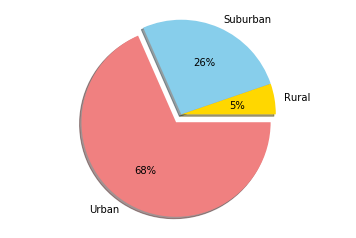

In [12]:
# PIE CHART #3: DRIVERS

# Total Drivers by City Type
city_driver_pie = datasets_complete_df.groupby(["type"])["city"].count()
# Index for the Driver type
city_driver_pie.index
# Set Colors for section of Pie Chart
colors = ["gold", "skyblue", "lightcoral"]
# Slice from the Suburban and Rural sections
explode = (0,0, 0.1)
# Create Pie Chart
plt.pie(city_driver_pie, 
        labels = city_driver_pie.index, 
        autopct = "%1.0f%%", 
        colors = colors, 
        explode = explode, 
        shadow = True, )
plt.axis("equal")
plt.show()

# Observable trends based on the data:
     1. Rural cities have less available ride hailing services then more dense populated cities.
     2. Rural drivers average fare is higher than suburban and urban average. Probably due to longer rides.
     3. Suburban drivers appear to have the best of both worlds, less drives and higher fares. 